In [63]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
from wordcloud import WordCloud
from sklearn.metrics import accuracy_score, log_loss
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [64]:
trd = pd.read_csv('train.csv', keep_default_na=False)
tsd = pd.read_csv('test.csv')
td = pd.concat([trd, tsd], ignore_index=True, sort = False)


Text(0.5, 1.0, 'Missing values heatmap')

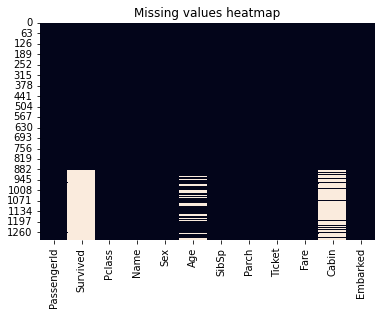

In [65]:
td.isnull().sum()
sns.heatmap(td.isnull(), cbar = False).set_title("Missing values heatmap")

In [66]:
td['Fare_Category'] = pd.cut(td['Fare'], bins=[0,7.90,14.45,31.28,120], labels=['Low','Mid', 'High_Mid','High'])

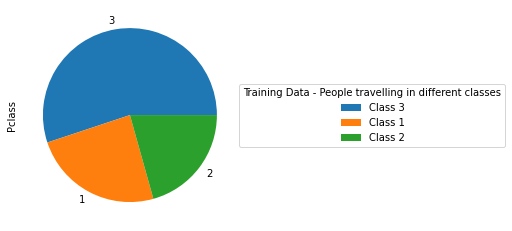

In [67]:
fig_pclass = trd.Pclass.value_counts().plot.pie().legend(labels=["Class 3","Class 1","Class 2"], loc='center right', bbox_to_anchor=(2.25, 0.5)).set_title("Training Data - People travelling in different classes")

In [68]:
print(trd.Pclass.value_counts())

3    491
1    216
2    184
Name: Pclass, dtype: int64


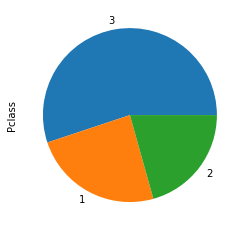

In [69]:
fig_pclass = trd.Pclass.value_counts().plot.pie()


Text(0.5, 1.0, 'Training Data - Percentage of people survived on the basis of class')

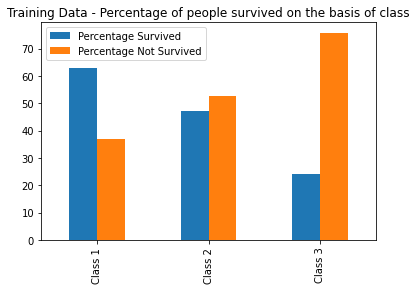

In [70]:
pclass_1_survivor_distribution = round((trd[trd.Pclass == 1].Survived == 1).value_counts()[1]/len(trd[trd.Pclass == 1]) * 100, 2)
pclass_2_survivor_distribution = round((trd[trd.Pclass == 2].Survived == 1).value_counts()[1]/len(trd[trd.Pclass == 2]) * 100, 2)
pclass_3_survivor_distribution = round((trd[trd.Pclass == 3].Survived == 1).value_counts()[1]/len(trd[trd.Pclass == 3]) * 100, 2)
pclass_perc_df = pd.DataFrame(
    { "Percentage Survived":{"Class 1": pclass_1_survivor_distribution,"Class 2": pclass_2_survivor_distribution, "Class 3": pclass_3_survivor_distribution},  
     "Percentage Not Survived":{"Class 1": 100-pclass_1_survivor_distribution,"Class 2": 100-pclass_2_survivor_distribution, "Class 3": 100-pclass_3_survivor_distribution}})
pclass_perc_df.plot.bar().set_title("Training Data - Percentage of people survived on the basis of class")



In [71]:
print (trd.notnull().any(axis = 0))

PassengerId    True
Survived       True
Pclass         True
Name           True
Sex            True
Age            True
SibSp          True
Parch          True
Ticket         True
Fare           True
Cabin          True
Embarked       True
dtype: bool


In [72]:
df = trd.loc[:, trd.notnull().any(axis = 0)]
print (df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38      1   
2                               Heikkinen, Miss. Laina  female  26      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35      1   
4                             Allen, Mr. William Henry    male  35      0   
..                                                 ...     ...  ..    ...   
886 

In [73]:
trd.loc[
    (trd['Pclass'] == 1) &
    (trd['Sex'] == 'female') & 
    (trd['Survived'] == 1)
]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.5500,C103,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,,1,0,PC 17569,146.5208,B78,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49,1,0,PC 17572,76.7292,D33,C
...,...,...,...,...,...,...,...,...,...,...,...,...
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45,1,1,36928,164.8667,,S
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48,0,0,17466,25.9292,D17,S
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47,1,1,11751,52.5542,D35,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56,0,1,11767,83.1583,C50,C


In [74]:
trd[
    (trd['Pclass'] == 2) &
    (trd['Sex'] == 'female') & 
    (trd['Survived'] == 1)
].value_counts()

PassengerId  Survived  Pclass  Name                                                 Sex     Age  SibSp  Parch  Ticket           Fare     Cabin  Embarked
881          1         2       Shelley, Mrs. William (Imanita Parrish Hall)         female  25   0      1      230433           26.0000         S           1
388          1         2       Buss, Miss. Kate                                     female  36   0      0      27849            13.0000         S           1
317          1         2       Kantor, Mrs. Sinai (Miriam Sternin)                  female  24   1      0      244367           26.0000         S           1
323          1         2       Slayter, Miss. Hilda Mary                            female  30   0      0      234818           12.3500         Q           1
324          1         2       Caldwell, Mrs. Albert Francis (Sylvia Mae Harbaugh)  female  22   1      1      248738           29.0000         S           1
                                                         

In [75]:
trd.loc[
    (trd['Pclass'] == 3) &
    (trd['Sex'] == 'female') & 
    (trd['Survived'] == 1)
]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7000,G6,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,,0,0,2649,7.2250,,C
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15,0,0,330923,8.0292,,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
823,824,1,3,"Moor, Mrs. (Beila)",female,27,0,1,392096,12.4750,E121,S
830,831,1,3,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15,1,0,2659,14.4542,,C
855,856,1,3,"Aks, Mrs. Sam (Leah Rosen)",female,18,0,1,392091,9.3500,,S
858,859,1,3,"Baclini, Mrs. Solomon (Latifa Qurban)",female,24,0,3,2666,19.2583,,C


In [76]:
print(trd['Sex'])

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object


In [77]:
# https://keras.io/api/models/sequential/
# https://keras.io/api/models/model/
# 
import tensorflow as tf

In [78]:
model = tf.keras.Sequential()
#  Input - Layer
model.add(tf.keras.layers.Dense(8, input_shape=(16,)))

In [79]:
model.add(tf.keras.layers.Dropout(0.3, noise_shape=None, seed=None))
model.add(tf.keras.layers.Dense(50, activation = "relu"))
model.add(tf.keras.layers.Dropout(0.1, noise_shape=None, seed=None))
model.add(tf.keras.layers.Dense(50, activation = "relu"))
model.add(tf.keras.layers.Dropout(0.1, noise_shape=None, seed=None))
model.add(tf.keras.layers.Dense(6, activation = "relu"))

In [80]:
# Output- Layer
model.add(tf.keras.layers.Dense(2, activation = "sigmoid"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 8)                 136       
                                                                 
 dropout_6 (Dropout)         (None, 8)                 0         
                                                                 
 dense_11 (Dense)            (None, 50)                450       
                                                                 
 dropout_7 (Dropout)         (None, 50)                0         
                                                                 
 dense_12 (Dense)            (None, 50)                2550      
                                                                 
 dropout_8 (Dropout)         (None, 50)                0         
                                                                 
 dense_13 (Dense)            (None, 6)                

In [81]:
model.compile(
 optimizer = "adam",
 loss = "binary_crossentropy",
 metrics = ["accuracy"]
)

In [82]:
#results = model.fit( trd, epochs = 3,  batch_size = 500, validation_data = tsd)

In [83]:
pd.get_dummies(trd.Sex, prefix="Sex", drop_first = False)

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [84]:
pd.get_dummies(trd.Embarked, prefix="Emb", drop_first = False)


,Emb_,Emb_C,Emb_Q,Emb_S
0,0,0,0,1
1,0,1,0,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
886,0,0,0,1
887,0,0,0,1
888,0,0,0,1
889,0,1,0,0


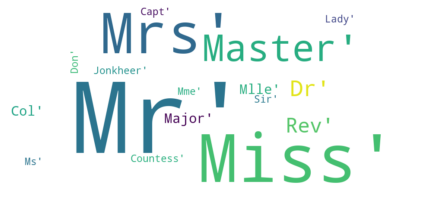

5          Mr
17         Mr
19        Mrs
26         Mr
28       Miss
29         Mr
31        Mrs
32       Miss
36         Mr
42         Mr
45         Mr
46         Mr
47       Miss
48         Mr
55         Mr
64         Mr
65     Master
76         Mr
77         Mr
82       Miss
87         Mr
95         Mr
101        Mr
107        Mr
109      Miss
121        Mr
126        Mr
128      Miss
140       Mrs
154        Mr
158        Mr
159    Master
166       Mrs
168        Mr
176    Master
180      Miss
181        Mr
185        Mr
186       Mrs
196        Mr
198      Miss
201        Mr
214        Mr
223        Mr
229      Miss
235      Miss
240      Miss
241      Miss
250        Mr
256       Mrs
260        Mr
264      Miss
270        Mr
274      Miss
277        Mr
284        Mr
295        Mr
298        Mr
300      Miss
301        Mr
303      Miss
304        Mr
306      Miss
324        Mr
330      Miss
334       Mrs
335        Mr
347       Mrs
351        Mr
354        Mr
358      Miss
359   

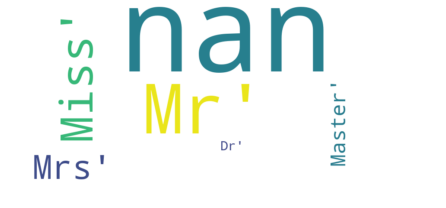

Mr        119
Miss       36
Mrs        17
Master      4
Dr          1
Name: Salutation_no_age, dtype: int64

In [88]:


trd['Salutation'] = trd.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip()) 
trd.Salutation.nunique()
wc = WordCloud(width = 1000,height = 450,background_color = 'white').generate(str(trd.Salutation.values))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


trd_no_age = trd.loc[trd.Age == ""]
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display (trd_no_age.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip()))

trd['Salutation_no_age'] = trd_no_age.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip()) 
trd.Salutation_no_age.nunique()
wc = WordCloud(width = 1000,height = 450,background_color = 'white').generate(str(trd.Salutation_no_age.values))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

trd['Salutation_no_age'].value_counts()

In [86]:
grp = trd.groupby(['Sex', 'Pclass'])  
for key, item in grp:
    print(key, "->", item)

trd.Age = grp.Age.apply(lambda x: x.fillna(x.median()))
print(td.Age)
#If still any row remains
trd.Age.fillna(trd.Age.median, inplace = True)

('female', 1) ->      PassengerId  Survived  Pclass  \
1              2         1       1   
3              4         1       1   
11            12         1       1   
31            32         1       1   
52            53         1       1   
..           ...       ...     ...   
856          857         1       1   
862          863         1       1   
871          872         1       1   
879          880         1       1   
887          888         1       1   

                                                  Name     Sex Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38      1   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35      1   
11                            Bonnell, Miss. Elizabeth  female  58      0   
31      Spencer, Mrs. William Augustus (Marie Eugenie)  female          1   
52            Harper, Mrs. Henry Sleeper (Myna Haxtun)  female  49      1   
..                                                 ...     ...  

TypeError: 